# maze_random_walk

This Python script generates a maze represented as a 2D array of 0s and 1s, where 0s represent paths and 1s represent walls. It then simulates a random walk through the maze using reinforcement learning. The maze is traversed multiple times, and at each step, the agent chooses a direction based on a policy, with probabilities adjusted through reinforcement learning. The script visualizes the maze, the visited cells, and the policy's probabilities for each action at each position.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *

Vi börjar med att skapa en Maze. Mazen representeras som en 2D-array av 0:or och 1:0r.
- 0:or = Vägen
- 1:or = Väggar

Funktionen börjar med att skapa två listor.
- Vis
- Hor

(17, 17)


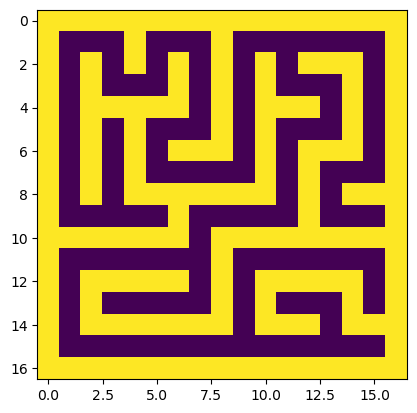

In [3]:

def make_maze(w = 16, h = 8):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
 
maze=numpy.array(make_maze(8,8))
imshow(maze)
#ylim(-0.5,16.5)
print(maze.shape)

In [4]:
print(maze)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1]
 [1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1]
 [1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1]
 [1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1]
 [1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


Denna kod representerar en slumpmässig (Random) gång genom Mazen.


[0.22 0.26 0.26 0.26]
2431.0 2431


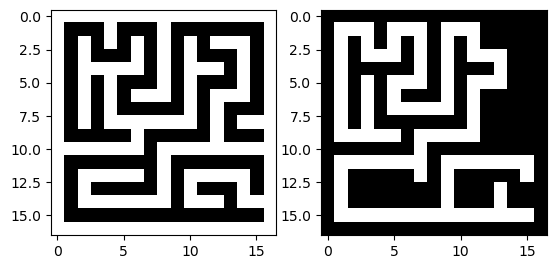

In [5]:
# 2D Array med nollor som håller koll på vilka celler som har blivit besökta.
visited=numpy.zeros((17,17))

# Numpy Array som innehåller
policy=numpy.array([0.22,0.26,0.26,0.26])
print(policy)

# Start position (1,1)
x=1 #x-coor start position
y=1 #y-coor start position

# Lists för momments: höger, vänster, upp & ned.
xm=[0,1,0,-1]
ym=[1,0,-1,0]


# track X & Y precis som det låter, från start position.
trackX=[x]
trackY=[y]

# Markera start positionen som besökt/visited
visited[x][y]=1
# Så länge den nuvarande position inte är målet (15,15) fortsätt att köra.
while x!=15 or y!=15:
    direction=numpy.random.choice([0,1,2,3],p=policy)
    # Välj en direction baserat på policy som är slumpmässig
    
    # Beräknar X & Y coordinat efter den har valt riktning/direction.
    tx=x+xm[direction]
    ty=y+ym[direction]
    
    # Ifall positionen inte är en vägg i vald riktning
    if maze[tx][ty]==0:
        
        # Uppdatera X & Y coordinat av den nuvarande position.
        x=tx
        y=ty
        
        # Markera den nya position som besökt genom att öka motsvarande element i besökt/visited.
        visited[x][y]+=1
        
        # Lägger till den nya X/Y coordinat till trackX & trackY
        trackX.append(x)
        trackY.append(y)
        
# Skapar en plot med 1row & 2cols, och select första elemntet i subplot        
subplot(1,2,1)
imshow(maze,cmap='gray')
# Väljer det andra då det är 2 istället för 1.
subplot(1,2,2)
imshow(visited,cmap='gray',vmax=1)
# Skriver ut det totala antalet of cells besökta och längend av TrackX listan.
print(visited.sum(),len(trackX))

In [6]:
# Skapa en 3D-array "policy" med alla element inställda på 0.25 och en storlek på (17x17x4)
# Skriver sedan ut formen, samt 1,1 & 1,3
policy=numpy.ones((17,17,4))/4.0
print(policy.shape)
print(policy[1][1])
print(policy[1][3])

# Sätter elementen vid index 1,1 till [0,0,1,0] 
# Samt sätter elementen vid index 1,1 till [0,1,0,0]
policy[1][1]=numpy.array([0.0,0.0,1.0,0.0])
policy[1][3]=numpy.array([0.0,1.0,0.0,0.0])
print(policy[1][1])
print(policy[1][3])


(17, 17, 4)
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0. 0. 1. 0.]
[0. 1. 0. 0.]


4869.0 4869


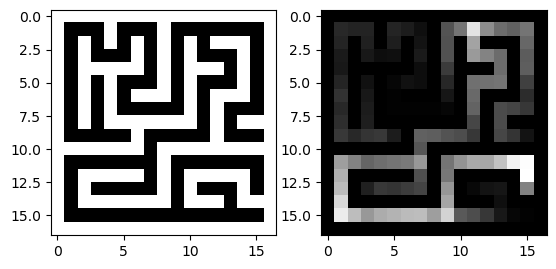

In [7]:
# Igen: 2D Array med nollor som håller koll på vilka celler som har blivit besökta.
visited=numpy.zeros((17,17))

# Skapar en 3D array med alla element satta till 0.25
policy=numpy.ones((17,17,4))/4.0

# Ställer in Learningrate 
learningRate=0.01

# X & Y coord för start position.
x=1
y=1

# track X & Y precis som det låter, från start position.
# Resterande är det samma som tidigare
xm=[0,1,0,-1]
ym=[1,0,-1,0]
trackX=[x]
trackY=[y]
actions=[]
visited[x][y]=1
while x!=15 or y!=15:
    direction=numpy.random.choice([0,1,2,3],p=policy[x][y])
    tx=x+xm[direction]
    ty=y+ym[direction]
    if maze[tx][ty]==0:
        x=tx
        y=ty
        visited[x][y]+=1
        trackX.append(x)
        trackY.append(y)
        actions.append(direction)
        
        # Loopar igenom elements i actions list
for i in range(len(actions)):
    policy[trackX[i]][trackY[i]][actions[i]]+=learningRate
    # Uppdatera policyn på motsvarande position och riktning
    
for i in range(17): # loopa igenom rows av policy array.
    for j in range(17): # Loopa igenom cols
        policy[i][j]/=policy[i][j].sum()
        # Normalisera elementen i "policy"-arrayen
        
subplot(1,2,1)
imshow(maze,cmap='gray')
subplot(1,2,2)
imshow(visited,cmap='gray')
print(visited.sum(),len(trackX))

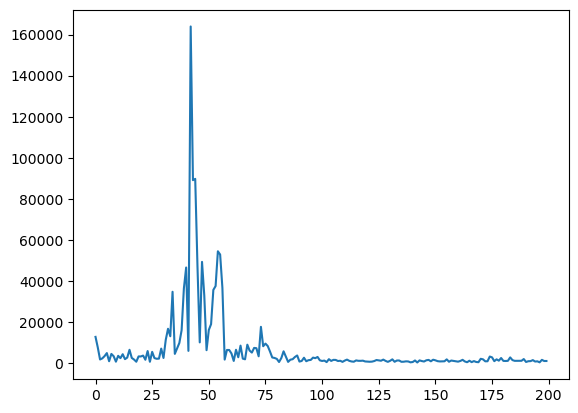

In [12]:
# Skapar en 3D array med alla element satta till 0.25
# Ställer in Learningrate 
policy=numpy.ones((17,17,4))/4.0
learningRate=0.01


# Loopar 200 gånger.
# 
'''mainloopen kommer att köras 200 gånger, och vid varje körning kommer den att följa en väg genom en labyrint representerad som ett 17x17 rutnät lagrat i en
2D-array som kallas labyrint. Sökvägen lagras i listorna trackX och trackY, som registrerar de besökta x- och y-positionerna, och list actions, som registrerar 
de steg som vidtagits vid varje position.


Variablerna x och y initieras till startpositionen för labyrinten (1,1). 
Variablerna xm och ym är listor som lagrar offseten för de fyra möjliga åtgärderna (upp, ner, vänster, höger). 
Listan som besöks är en 2D-array som håller reda på vilka positioner som har besökts under den aktuella körningen av loopen.
listaction körs som en tom lista och startpositionen (1,1) markeras som besökt i den besökta arrayen.'''

L=[]
for i in range(200):
    visited=numpy.zeros((17,17))
    x=1
    y=1
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    trackX=[x]
    trackY=[y]
    actions=[]
    visited[x][y]=1
    while x!=15 or y!=15:
        direction=numpy.random.choice([0,1,2,3],p=policy[x][y])
        tx=x+xm[direction]
        ty=y+ym[direction]
        if maze[tx][ty]==0:
            x=tx
            y=ty
            visited[x][y]+=1
            trackX.append(x)
            trackY.append(y)
            actions.append(direction)

    for i in range(len(actions)):
        # Gå igenom elementen i "actions"-listan
        policy[trackX[i]][trackY[i]][actions[i]]+=learningRate
        # Uppdatera policyn på motsvarande position och riktning
    for i in range(17):
        for j in range(17):
            policy[i][j]/=policy[i][j].sum()
    L.append(len(actions))
    #Lägg till längden på action-listan till L-listan
    
plot(L)


2026


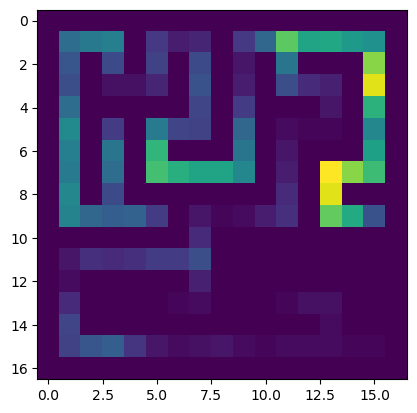

In [9]:
imshow(visited)
print(len(actions))

len(actions) ger längden på listan actions, som innehåller åtgärderna som har tagits under en iteration av huvu

dloop 
för förstärkningsinlärningsalgoritmen. print(len(actions)) kommer att skriva ut längden på action-listan.

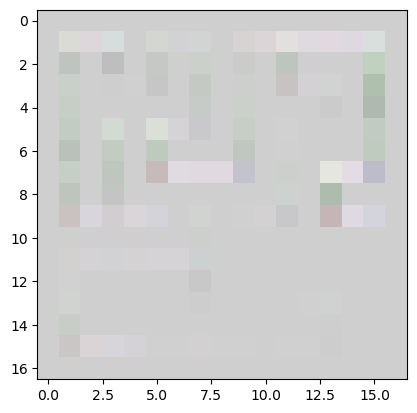

In [10]:
imshow(policy)